In [1]:
import featexp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyecharts

featexp.base #文档路径  
featexp.draw_plots  
featexp.get_grouped_data  
featexp.get_trend_changes  
featexp.get_trend_correlation  
featexp.get_trend_stats #训练数据和测试数据之间的关联性 选择特征字段即可  
featexp.get_univariate_plots #数据单变量分布状态  
featexp.univariate_plotter #单变量绘图  

In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
data_train = pd.read_csv("data/card_train.csv")
data_test = pd.read_csv("data/card_test.csv")
feature_list = train.columns[1:-1].tolist()
data_feature_list = data_train.columns[1:-1].tolist()

                                             Plots for V4                                             


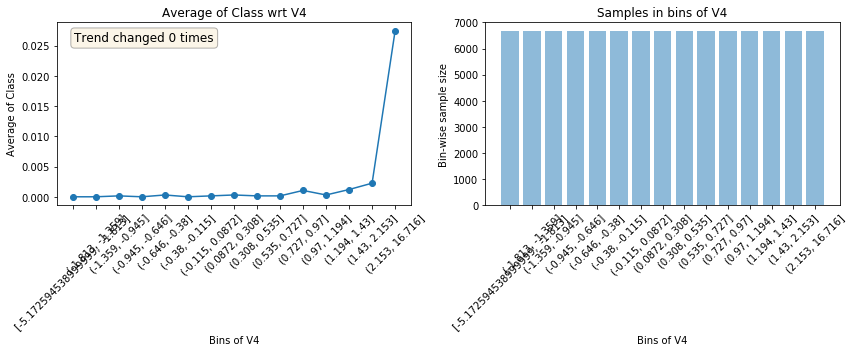

--------------------------------------------------------------------------------------------------------------




In [6]:
#数据单变量分布状态
featexp.get_univariate_plots(data=data_train, target_col='Class',features_list=data_feature_list[3:4], bins=15)

                                             Plots for V4                                             
                                           Train data plots                                           


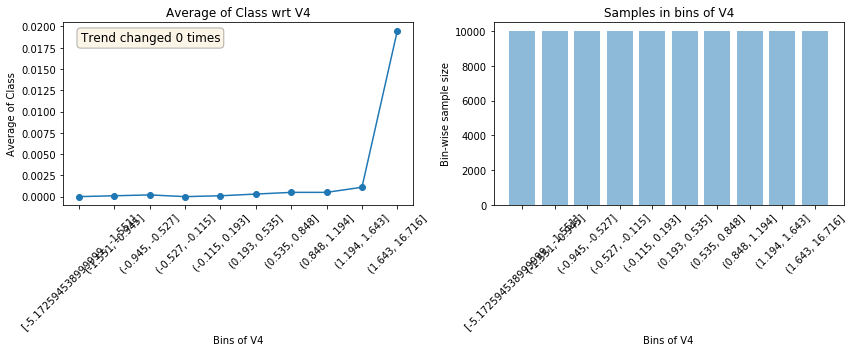

                                           Test data plots                                            


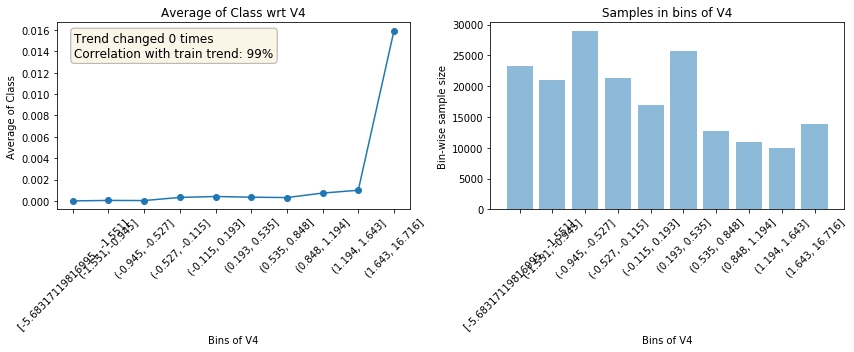

--------------------------------------------------------------------------------------------------------------




(                              V4  Samples_in_bin  Class_mean   V4_mean
 0  [-5.172594538999999,  -1.551]           10000      0.0000 -2.171775
 1               (-1.551, -0.945]           10000      0.0001 -1.257434
 2               (-0.945, -0.527]           10000      0.0002 -0.717402
 3               (-0.527, -0.115]           10000      0.0000 -0.311722
 4                (-0.115, 0.193]           10000      0.0001  0.037340
 5                 (0.193, 0.535]            9999      0.0003  0.370914
 6                 (0.535, 0.848]           10000      0.0005  0.686378
 7                 (0.848, 1.194]           10000      0.0005  1.027795
 8                 (1.194, 1.643]           10000      0.0011  1.378876
 9                (1.643, 16.716]           10000      0.0195  2.583081,
                              V4  Samples_in_bin  Class_mean   V4_mean
 0  [-5.68317119816995,  -1.551]           23269    0.000000 -2.245235
 1              (-1.551, -0.945]           21046    0.000048 -1.2

In [7]:
#单变量绘图
featexp.univariate_plotter(data=data_train, target_col='Class', feature='V4',data_test=data_test)

In [8]:
# 检验 训练数据和测试数据之间的关联性 选择特征字段即可
featexp.get_trend_stats(data=data_train, target_col='Class',features_list=data_feature_list[:],data_test=data_test)

Returning stats for all numeric features


,Feature,Trend_changes,Trend_changes_test,Trend_correlation
0,V1,2,2,0.969287
1,V2,1,0,0.995821
2,V3,0,5,0.987151
3,V4,0,0,0.999371
4,V5,1,3,0.993884
5,V6,0,3,0.976150
6,V7,1,1,0.998292
7,V8,1,5,0.975763
8,V9,2,2,0.997190
9,V10,0,3,0.997333


##### 特征选取考虑方向：  
1.特征是否发散：如果一个特征不发散，例如方差接近于0，也就是说样本在这个特征上基本上没有差异，这个特征对于样本的区分并没有什么用。  
2.特征与目标的相关性：这点比较显见，与目标相关性高的特征，应当优选选择。除移除低方差法外，本文介绍的其他方法均从相关性考虑。  
##### 特征选取方法：  
1.Filter：过滤法，按照发散性或者相关性对各个特征进行评分，设定阈值或者待选择阈值的个数，选择特征。  
2.Wrapper：包装法，根据目标函数（通常是预测效果评分），每次选择若干特征，或者排除若干特征。  
3.Embedded：嵌入法，先使用某些机器学习的算法和模型进行训练，得到各个特征的权值系数，根据系数从大到小选择特征。类似于Filter方法，但是是通过训练来确定特征的优劣。  
##### 特征选取目标：  
1.减少特征数量、降维，使模型泛化能力更强，减少过拟合。  
2.增强对特征和特征值之间的理解。  

# 数据整理

整体可以参考 https://www.zhihu.com/question/28641663/answer/119913761

In [ ]:
# 统计训练数据的具体信息
train_info = train.info()
print(train_info)
cat_features = list(train.select_dtypes(include=['object']).columns)
print ("离散特征共计: {} 个".format(len(cat_features)))
cont_features = [cont for cont in list(train.select_dtypes(include=['float64', 'int64']).columns) if cont not in [train.columns[-1], train.columns[0]]]
print ("连续特征共计: {}  个".format(len(cont_features)))
id_col = list(train.select_dtypes(include=['int64']).columns)
print ("数据编号特征在第一列是: {}".format(train.columns[0]))
print ("进行预测的因变量特征是: {}".format(train.columns[-1]))

In [3]:
# 样本数据为离散型和连续性混合数据,业务类型为回归类型
# 划分train的离散数据和连续数据字段
object_features = [cont for cont in list(train.select_dtypes(include=['object']).columns) if cont not in [train.columns[0],train.columns[-1]]]
number_features = [cont for cont in list(train.select_dtypes(include=['float64', 'int64']).columns) if cont not in [train.columns[0],train.columns[-1]]]
# train中离散数据预处理，将标签数据转化成数字
for i in range(len(object_features)):
    train[object_features[i]] = train[object_features[i]].astype('category').cat.codes


In [ ]:
# 按照比例删除缺失数据
isnull_columns = []
isnull_percent = 0.4
for i in train.columns:
    isnull_col_percent = len(train[i][pd.isnull(train[i])])/len(train)
    if isnull_col_percent >= isnull_percent:
        isnull_columns.append(i)
train = train.drop(isnull_columns,axis=1)

In [ ]:
# 数据标准化和归一化
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

data_processing = "归一化"
x = train[number_features]
if data_processing == "归一化":
    minMax = MinMaxScaler()
    train[number_features] = minMax.fit_transform(x)
elif data_processing == "标准化":
    std = StandardScaler()
    train[number_features] = std.fit_transform(x)
else:
    pass

In [ ]:
# 填充缺失数据，离散特征填充众数，连续特征填充均值或者中位数
cat_fuction = ""
cont_fuction = ""
cat_features = list(train.select_dtypes(include=['object']).columns)
print ("最终确定离散特征共计: {} 个".format(len(cat_features)))
cont_features = [cont for cont in list(train.select_dtypes(include=['float64', 'int64']).columns) if cont not in [train.columns[-1], train.columns[0]]]
print ("最终确定连续特征共计: {}  个".format(len(cont_features)))
id_col = list(train.select_dtypes(include=['int64']).columns)

if cat_fuction == "众数":
    train[cat_features] = train[cat_features].fillna(train[cat_features].mode())
else:  
    train[cat_features] = train[cat_features].fillna(cat_fuction)
if cont_fuction == "均值":
    train[cont_features] = train[cont_features].fillna(train[cont_features].mean())
if cont_fuction == "众数":
    train[cont_features] = train[cont_features].fillna(train[cont_features].mode())
else:
    train[cat_features] = train[cat_features].fillna("0")

# 自定义特征选取方法

##### 筛选变化变化小的特征：Removing features with low variance  

   假设某特征的特征值只有0和1，并且在所有输入样本中，95%的实例的该特征取值都是1，那就可以认为这个特征作用不大。如果100%都是1，那这个特征就没意义了。当特征值都是离散型变量的时候这种方法才能用，如果是连续型变量，就需要将连续变量离散化之后才能用，而且实际当中，一般不太会有95%以上都取某个值的特征存在，所以这种方法虽然简单但是不太好用。可以把它作为特征选择的预处理，先去掉那些取值变化小的特征，然后再从接下来提到的的特征选择方法中选择合适的进行进一步的特征选择。

方法一：离散数据占比情况查看

In [4]:
# train标签样本占比表
df_percent = pd.DataFrame(train[object_features].apply(pd.value_counts).values/len(train),columns=[object_features])
# 查看离散特征数据百分比值特征
def percentmax_number(percentmix_number,df_percent):
    object_features_list = []
    for i in range(len(object_features))[:15]:
        df_c_values = df_percent[df_percent.columns[i]][df_percent[df_percent.columns[i]].notnull()]
        for j in df_c_values:
            if j > percentmix_number:
                object_features_list.append(df_percent.columns[i])
    return print("单一特征占比超过"+str(percentmix_number*100)+"%的字段有\n"+str(object_features_list))
percentmax_number(0.95,df_percent)

单一特征占比超过95.0%的字段有
[('cat7',), ('cat14',), ('cat15',)]


In [5]:
# 查看离散特征数据百分比情况
def object_features_percent(feature_number,df_percent):
    df_c_values = df_percent[df_percent.columns[feature_number]][df_percent[df_percent.columns[feature_number]].notnull()]
    attr = []
    for i in range(len(df_c_values)):
        attr.append("label:"+str(i))
    v1 = df_c_values
    pie = pyecharts.Pie("特征"+str(df_percent.columns[feature_number])+"示例")
    pie.add("", attr, df_c_values, is_label_show=True)
    return pie
object_features_percent(3,df_percent)

方法二：离散型变量直接处理

In [6]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.8*(1-0.8))#某一特征占比超过该阈值 布尔特征是伯努利随机变量，方差为 p(1-p)
sel_lab = sel.fit_transform(train[object_features])

##### 单变量特征选择 Univariate feature selection  
单变量特征选择能够对每一个特征进行测试，衡量该特征和响应变量之间的关系，根据得分扔掉不好的特征。对于回归和分类问题可以采用卡方检验等方式对特征进行测试。这种方法比较简单，易于运行，易于理解，通常对于理解数据有较好的效果（但对特征优化、提高泛化能力来说不一定有效）；这种方法有许多改进的版本、变种。  

单变量特征选择的原理是分别单独的计算每个变量的某个统计指标，根据该指标来判断哪些指标重要，剔除那些不重要的指标。  
1.分类问题(y离散)，可采用：卡方检验，f_classif, mutual_info_classif，互信息  
2.回归问题(y连续)，可采用：皮尔森相关系数，f_regression, mutual_info_regression，最大信息系数  

In [35]:
# 分类问题
# 卡方检验  方差分析  互信息
# 离散标签Y  非负数特征
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif #方差分析，计算方差分析（ANOVA）的F值 (组间均方 / 组内均方)
from sklearn.feature_selection import mutual_info_classif #互信息，互信息方法可以捕捉任何一种统计依赖，但是作为非参数方法。http://www.cnblogs.com/gatherstars/p/6004075.html
print(data_train[data_feature_list].shape)
X, y = np.abs(data_train[data_feature_list]),data_train["Class"]  #由于原始数据已经归一化，这里用abs处理
#卡方检验选取K个最佳特征
model_c = SelectKBest(mutual_info_classif, k=10)
df_c = model_c.fit_transform(X, y) 
model_c.pvalues_

(99999, 29)


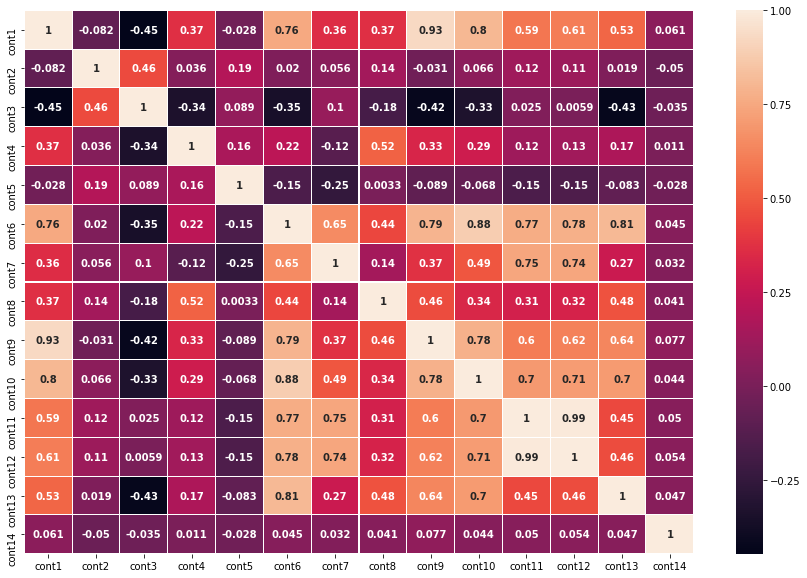

In [14]:
# 回归问题
# 皮尔森相关系数，f_regression, mutual_info_regression，最大信息系数
# 连续标签Y 
# 特征数据之间的相关性
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(15,10))
correlation_mat = train[number_features].corr()
sns.heatmap(correlation_mat, annot=True,linewidths = 0.05,annot_kws={'size':10,'weight':'bold'})

#### 相似系数距离弥补皮尔逊相关
1.常见的距离算法  
1.1欧几里得距离（Euclidean Distance）以及欧式距离的标准化（Standardized Euclidean distance）  
1.2马哈拉诺比斯距离（Mahalanobis Distance）  
1.3曼哈顿距离（Manhattan Distance）  
1.4切比雪夫距离（Chebyshev Distance）  
1.5明可夫斯基距离（Minkowski Distance）  
1.6海明距离（Hamming distance）  
2.常见的相似度（系数）算法  
2.1余弦相似度（Cosine Similarity）以及调整余弦相似度（Adjusted Cosine Similarity）  
2.2皮尔森相关系数（Pearson Correlation Coefficient）  
2.3Jaccard相似系数（Jaccard Coefficient）  
2.4Tanimoto系数（广义Jaccard相似系数）  
2.5对数似然相似度/对数似然相似率  
2.6互信息/信息增益，相对熵/KL散度  
2.7信息检索–词频-逆文档频率（TF-IDF）  
2.8词对相似度–点间互信息  
3.距离算法与相似度算法的选择（对比）  
欧式距离和余弦相似度
欧几里得距离度量会受指标不同单位刻度的影响，所以一般需要先进行标准化，同时距离越大，个体间差异越大  
空间向量余弦夹角的相似度度量不会受指标刻度的影响，余弦值落于区间[-1,1]，值越大，差异越小  
当两用户评分趋势一致时，但是评分值差距很大，余弦相似度倾向给出更优解。例如向量(3,3)和(5,5)，这两位用户的认知其实是一样的，但是欧式距离给出的解显然没有余弦值合理。  
余弦相似度衡量的是维度间相对层面的差异，欧氏度量衡量数值上差异的绝对值；一种长度与方向的度量所造成的不同；余弦相似度只在［0，1］之间，而马氏距离在［0，无穷）之间  
应用上如果要比较不同人的消费能力，可以使用欧式距离进行度量（价值度量）；如果想要比较不同用户是否喜欢周杰伦，可以使用余弦相似度（定性度量）  

In [42]:
from sklearn.feature_selection import f_regression 
from sklearn.feature_selection import mutual_info_regression
print(data_train[data_feature_list].shape)
X, y = train[number_features],train["loss"]  #由于原始数据已经归一化，这里用abs处理
#卡方检验选取K个最佳特征
model_r = SelectKBest(mutual_info_regression, k=10)
df_r = model_r.fit_transform(X, y) 
model_r.pvalues_

(99999, 29)


In [38]:
# MIC
# 互信息和最大信息系数  可以遍历筛选
from minepy import MINE
m = MINE()
m.compute_score(X["V1"],y)
print(m.mic())

0.02285730792870794
